[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [2]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
# %matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [4]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

In [8]:
plt.rc('axes', unicode_minus=False)

In [11]:
# 폰트가 선명하게 보이도록 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

C:\Users\pc\AppData\Local\Temp\ipykernel_17740\2657945662.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


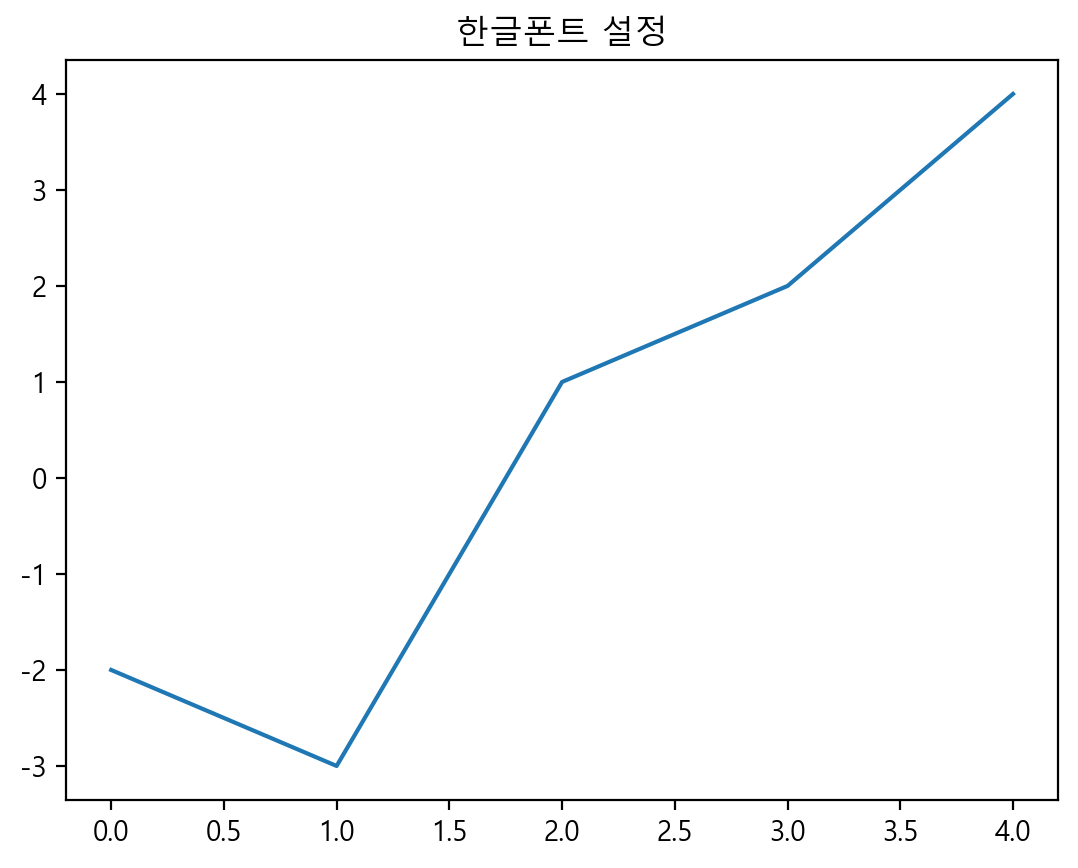

In [12]:
# 한글폰트와 마이너스 폰트 설정 확인

plt.title('한글폰트 설정')
plt.plot([-2, -3, 1, 2, 4])

## Google Colab 을 위한 코드
### Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [ ]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [ ]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [15]:
# 파일을 불러와 df 라는 변수에 담습니다.

df = pd.read_csv('C:/Users/pc/Documents/GitHub/Study-Python-data-analysis-with-Open-Government-Data/data/상가업소정보_201912_01.csv', sep = '|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


### 데이터 크기 보기

In [18]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.

df.shape

(573680, 39)

### info 보기

In [19]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

<Axes: >

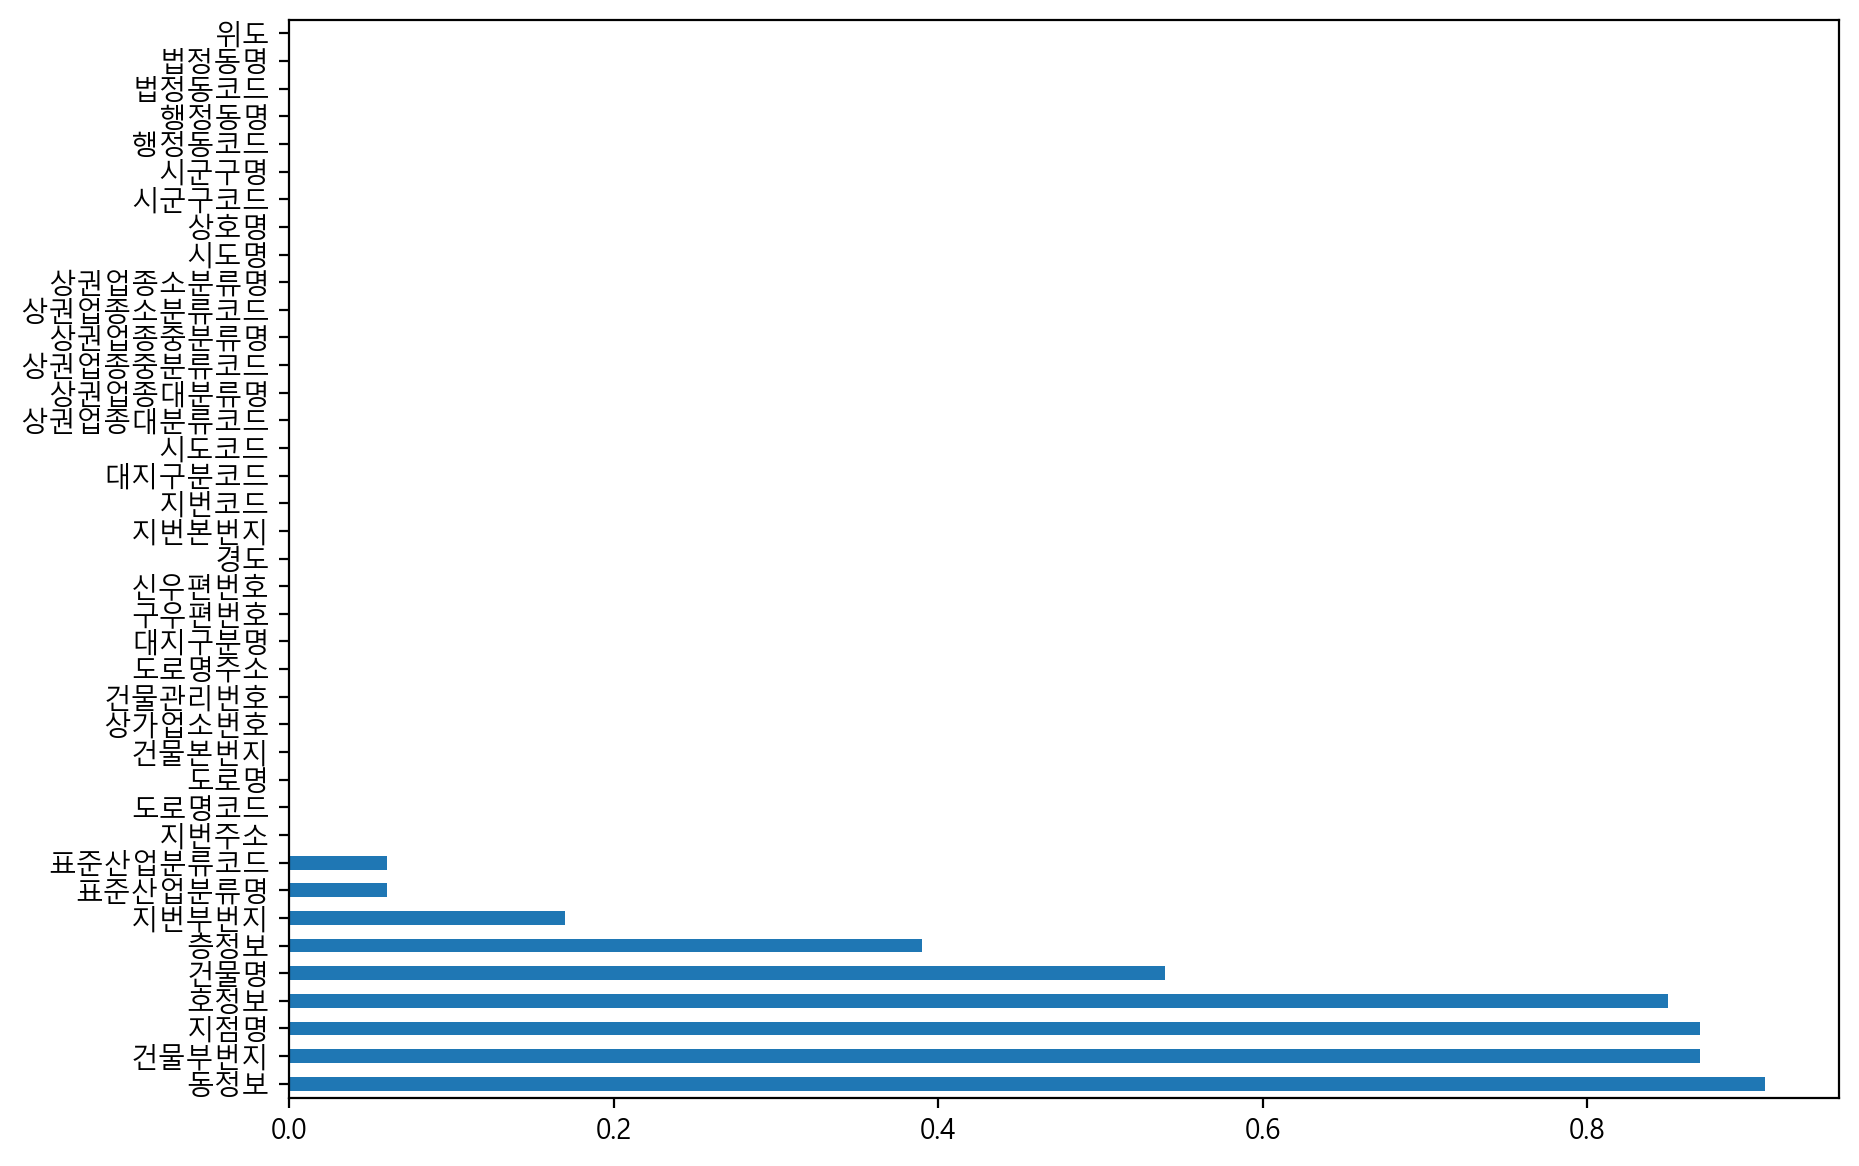

In [27]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.

df.isnull().mean().round(2).sort_values(ascending=False).plot.barh(figsize = (10,7))

### 사용하지 않는 컬럼 제거하기

In [28]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소',
           '경도', '위도']

print(df.shape)
df = df[columns].copy()
print(df.shape)

(573680, 39)
(573680, 11)


In [29]:
# 제거 후 메모리 사용량 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [33]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.

df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [38]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.

df_seoul['시군구명'].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [39]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.

df_seoul['시군구명'].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [40]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.

df_seoul.to_csv("seoul_open_store.csv", index=False)

In [43]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.

test = pd.read_csv("seoul_open_store.csv")
test.sample()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
398017,가치에스엔티,생활서비스,세탁/가사서비스,청소/소독,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 효령로55길 28,127.014469,37.486127


## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [44]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.

df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [52]:
# str.extract를 사용할 경우, '배'와 '베'인 케이스를 나누게 된다
# 이보단 해당경우에는 str.constrains를 사용하는 것이 이상적이다

df_seoul['상호명_소문자'].str.extract('(배|베)스킨라빈스|baskinrobbins').value_counts()

배    347
베    117
Name: count, dtype: int64

In [70]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

# df_seoul[df_seoul['상호명_소문자'].str.contains('(배|베)스킨라빈스|baskinrobbins')]
df_seoul[df_seoul['상호명_소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins')].shape

(466, 12)

In [71]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins'), "상호명_소문자"].shape

(466,)

In [72]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.

df_seoul.loc[df_seoul['상호명_소문자'].str.contains('던킨|dunkin'), '상호명_소문자'].shape

(191,)

In [73]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.

df_31 = df_seoul[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [74]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
# 아래 코드처럼 결측치를 던킨도너츠로 채워줘도 괜찮습니다.

df_31.loc[df_31['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins'), '브랜드명'] = '베스킨라빈스'
df_31[['상호명', '브랜드명']].head()

C:\Users\pc\AppData\Local\Temp\ipykernel_17740\2558099761.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '베스킨라빈스' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_31.loc[df_31['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins'), '브랜드명'] = '베스킨라빈스'


,상호명,브랜드명
76,배스킨라빈스,베스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,베스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [75]:
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
# df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
#           "브랜드명"]

df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')
df_31['브랜드명']


76        베스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      베스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    베스킨라빈스
561930    베스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [76]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.

df_31['상권업종대분류명'].value_counts()

상권업종대분류명
음식       655
소매         1
생활서비스      1
Name: count, dtype: int64

In [78]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.

df_31[df_31['상권업종대분류명'].isin(['소매', '생활서비스'])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,베스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,베스킨라빈스


In [81]:
# "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.

df_31 = df_31[~df_31['상권업종대분류명'].isin(['소매', '생활서비스'])].copy()
df_31.shape

(655, 13)

### 범주형 값으로 countplot 그리기

TypeError: Axes.barh() missing 2 required positional arguments: 'y' and 'width'

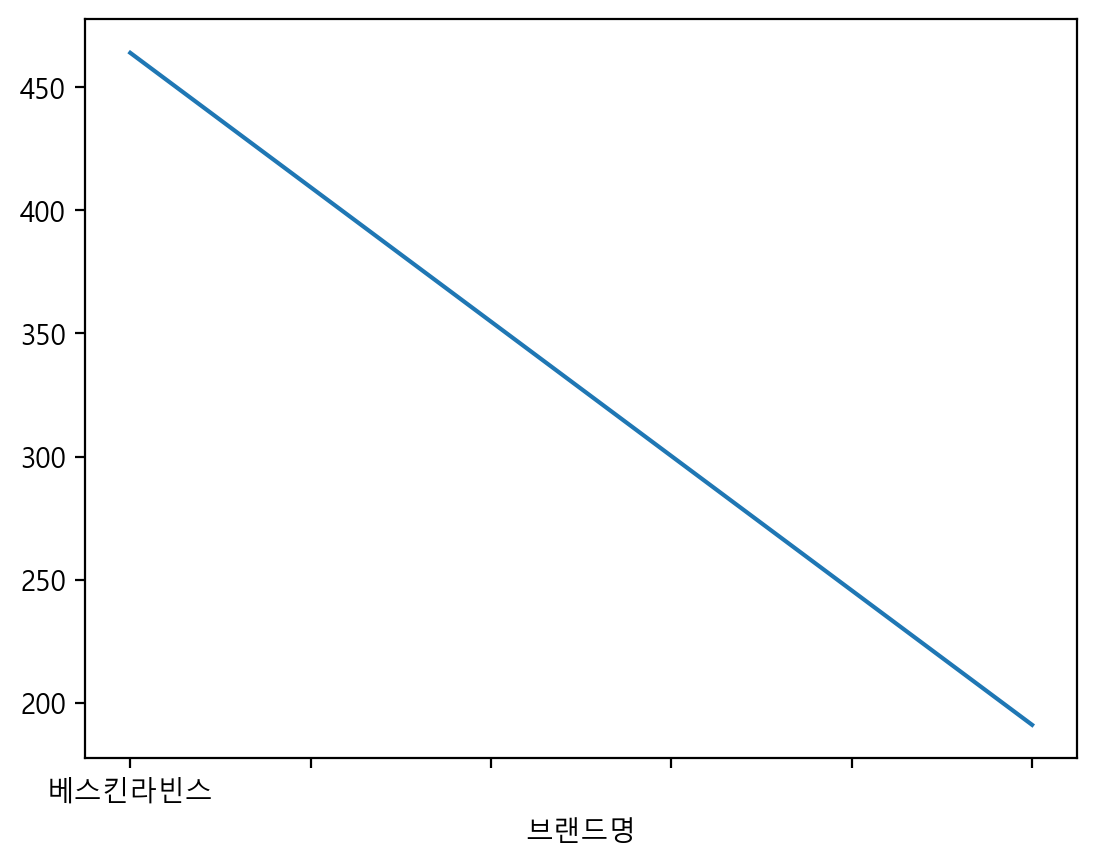

In [94]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.

brand_count = df_31['브랜드명'].value_counts()
brand_count.plot().barh()

<Axes: ylabel='브랜드명'>

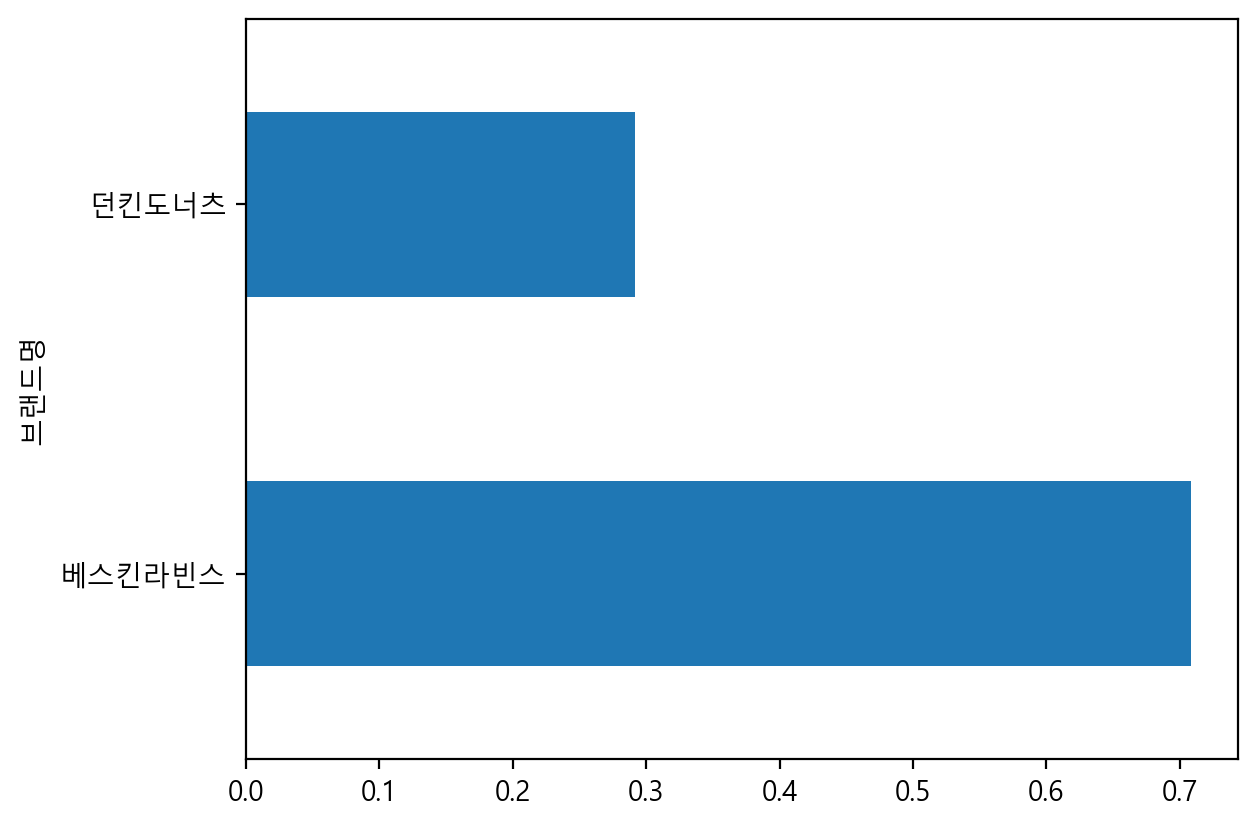

In [83]:
# normalize=True 로 빈도수의 비율을 구합니다.

df_31['브랜드명'].value_counts(normalize=True).plot.barh()

In [95]:
brand_count[0]

C:\Users\pc\AppData\Local\Temp\ipykernel_17740\4099861960.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  brand_count[0]


464

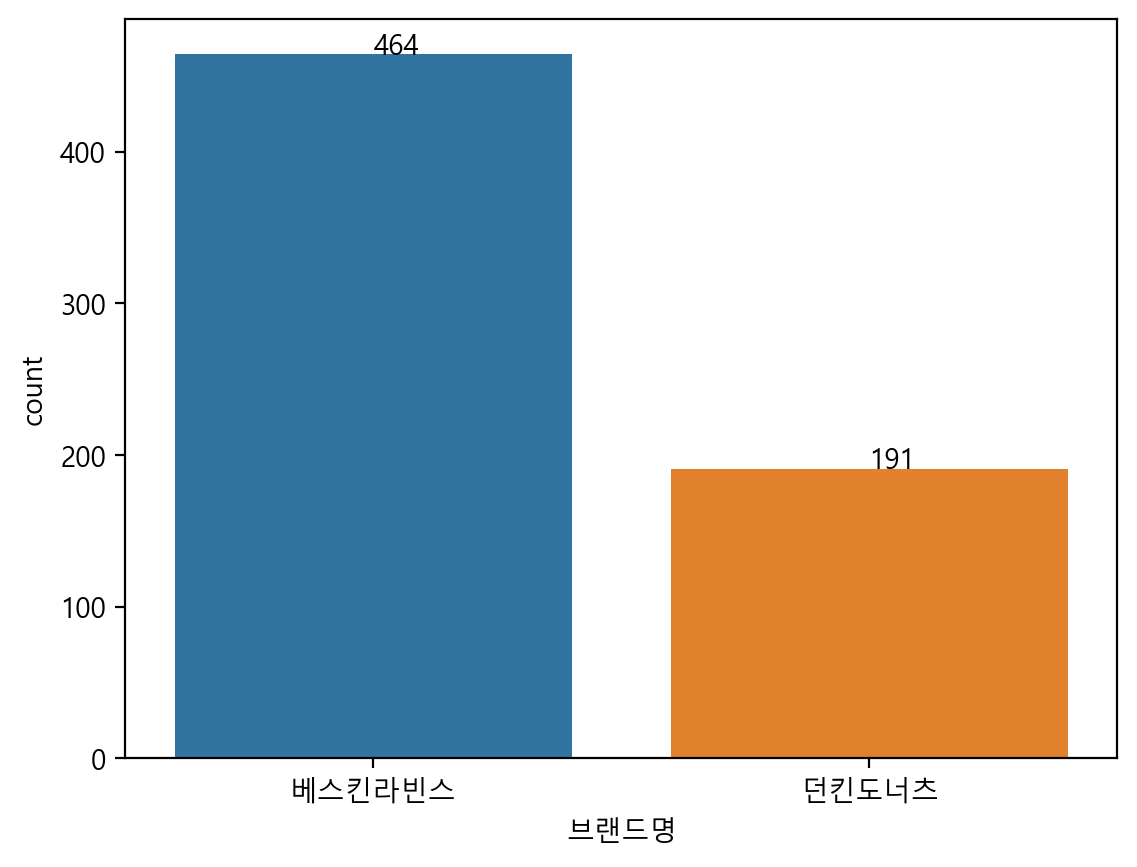

In [100]:
# countplot 을 그립니다.

g = sns.countplot(data=df_31, x='브랜드명',hue='브랜드명')

for i in brand_count.index:
    g.text(x=i, y=brand_count[i], s=brand_count[i])

<Axes: xlabel='시군구명', ylabel='count'>

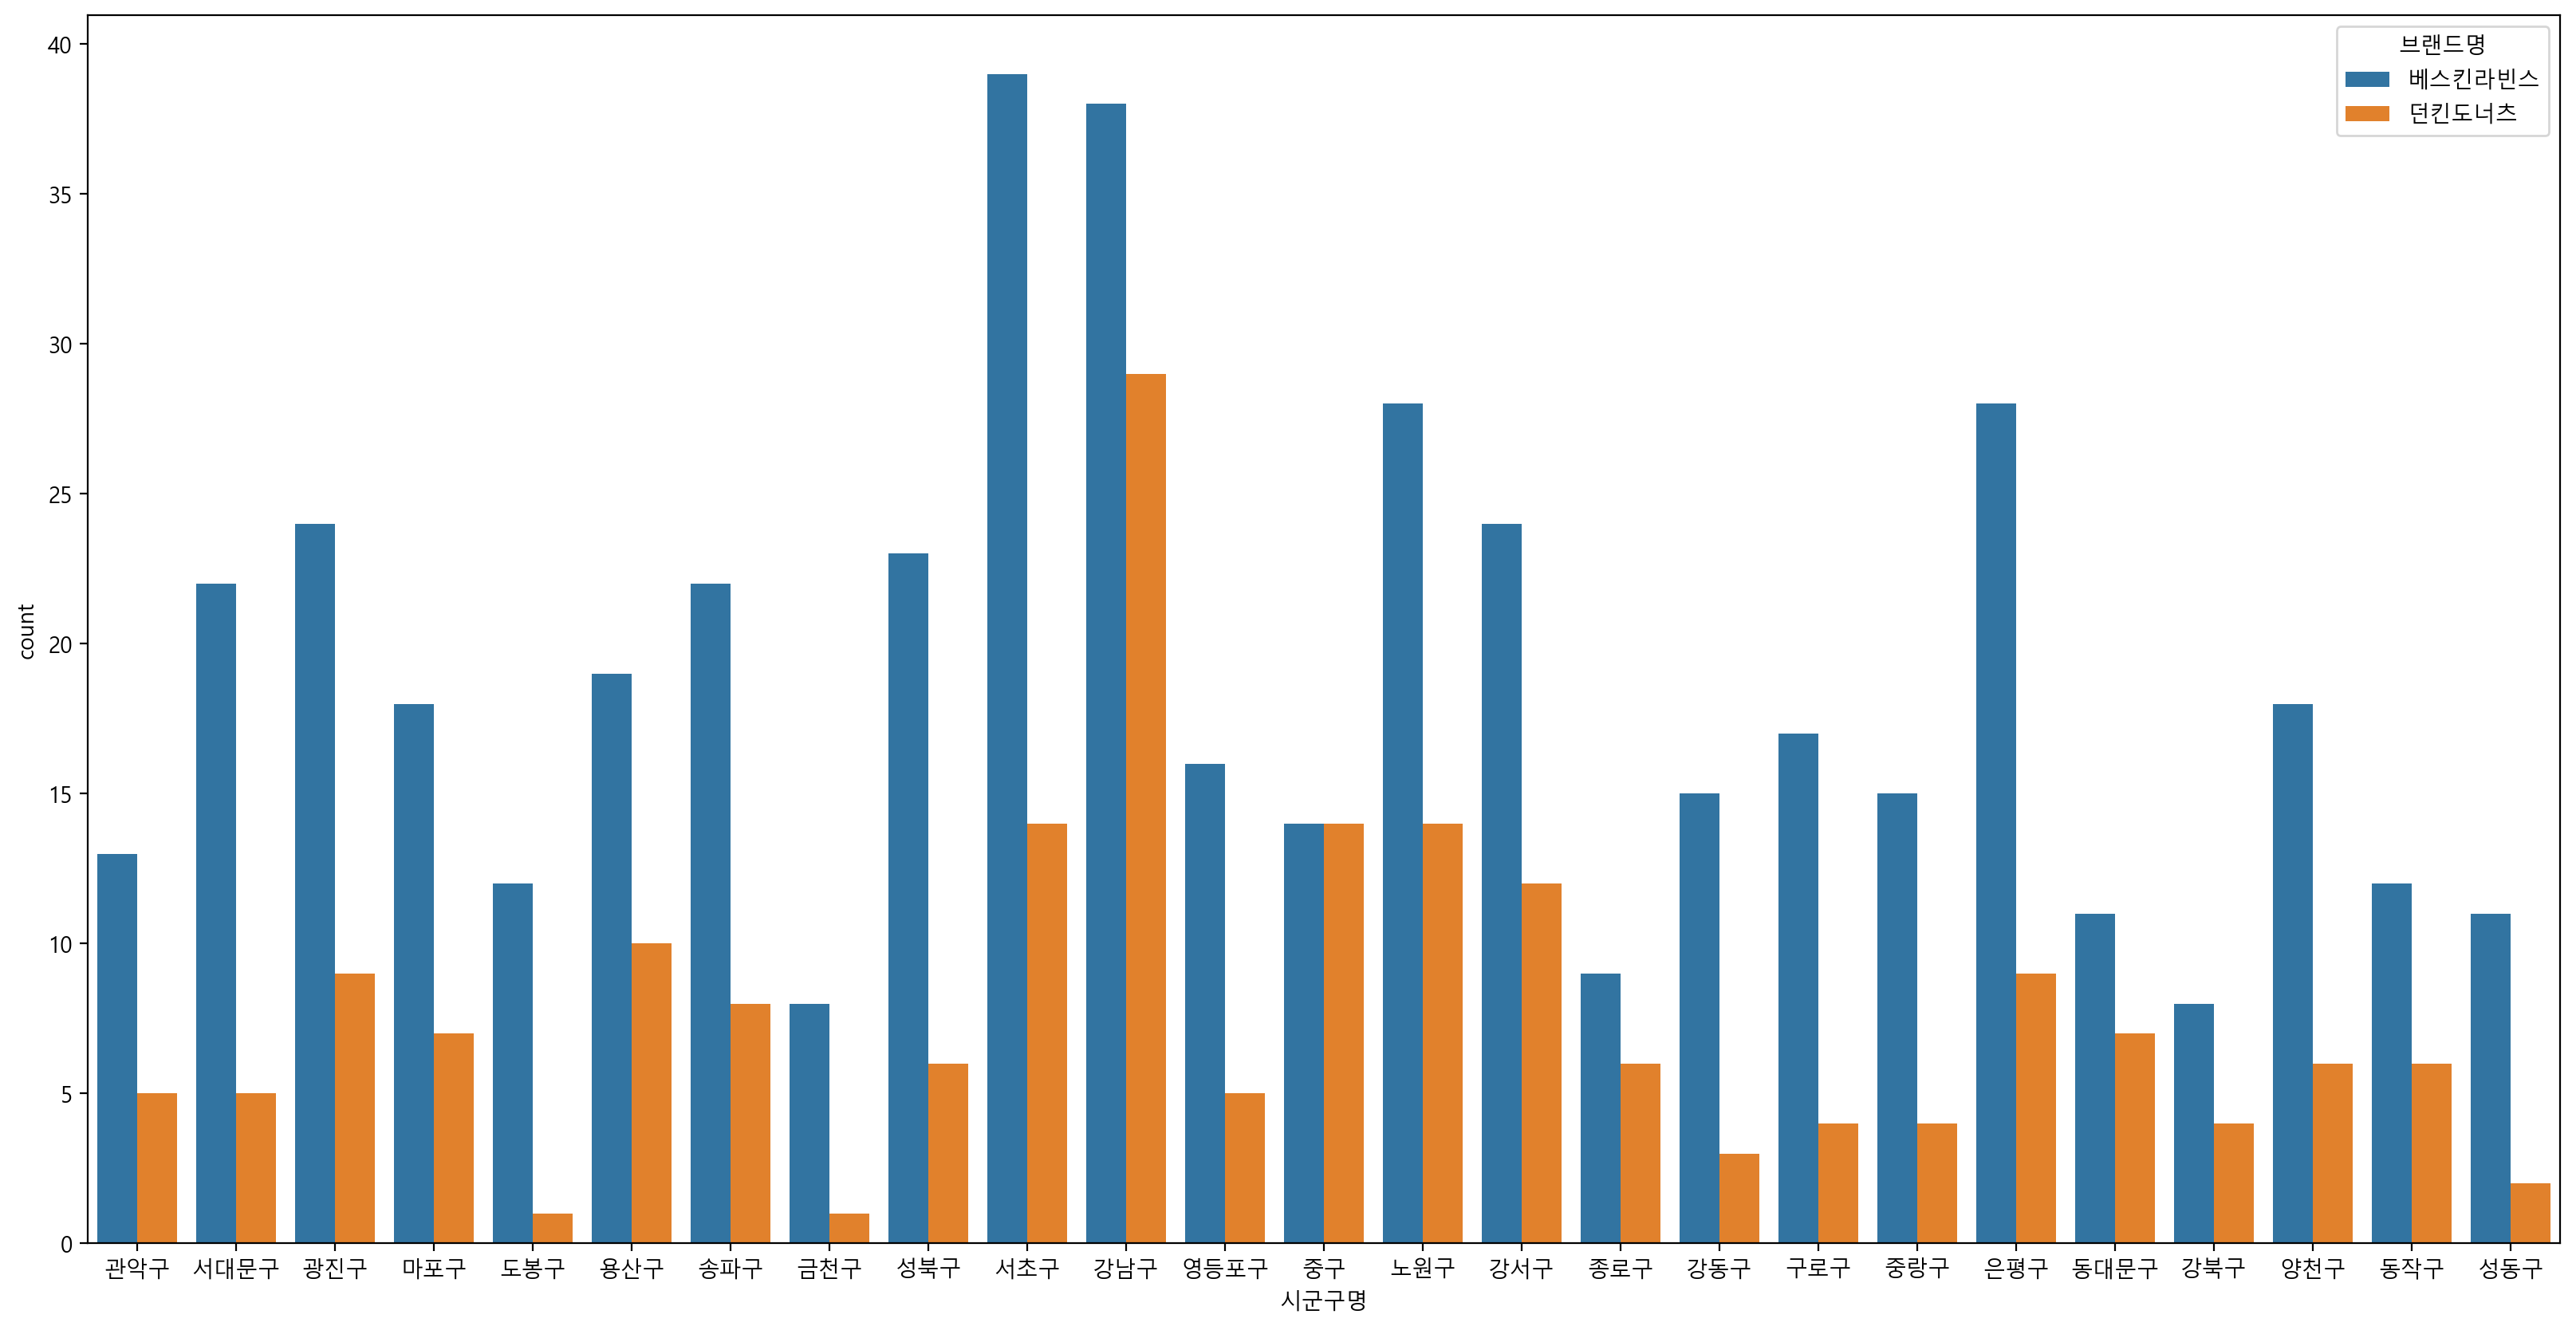

In [103]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.

plt.figure(figsize=(20,10))
sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

<Axes: xlabel='경도', ylabel='위도'>

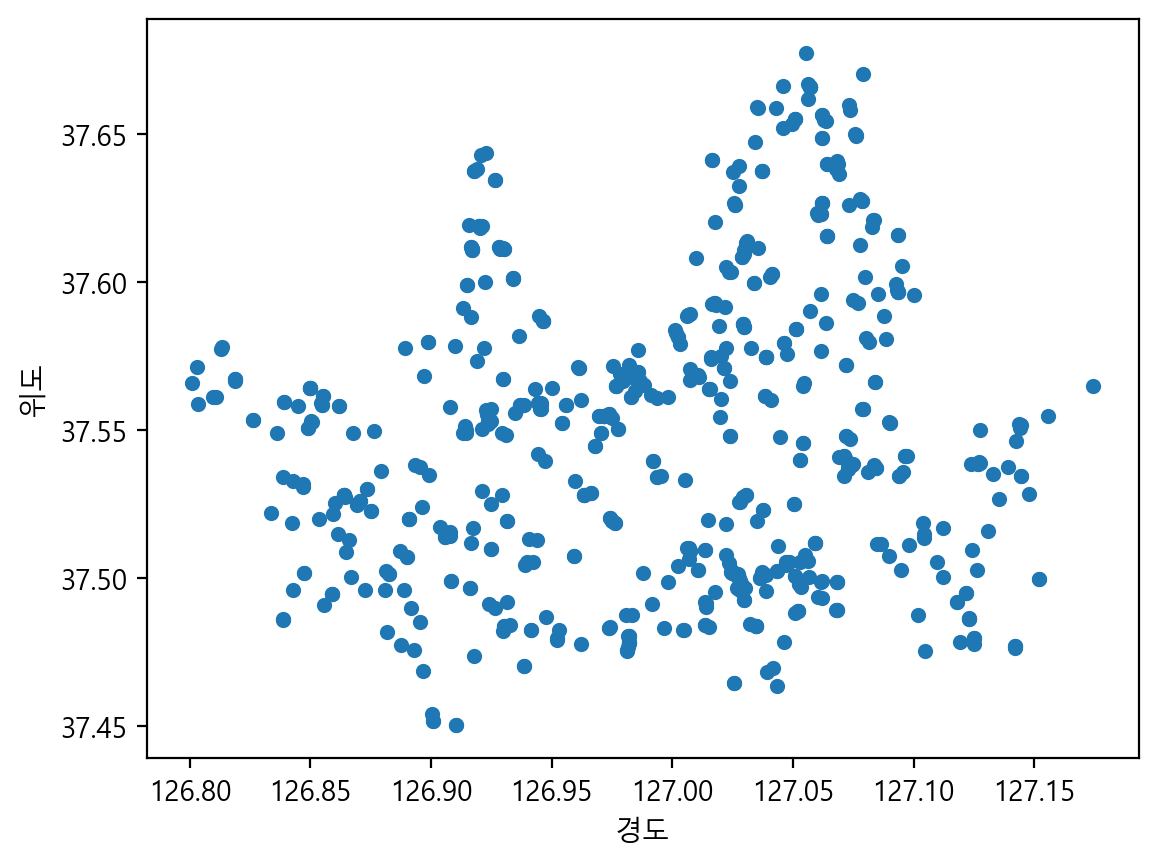

In [105]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.

df_31[['위도', '경도']].plot.scatter(x='경도', y='위도')

<Axes: xlabel='경도', ylabel='위도'>

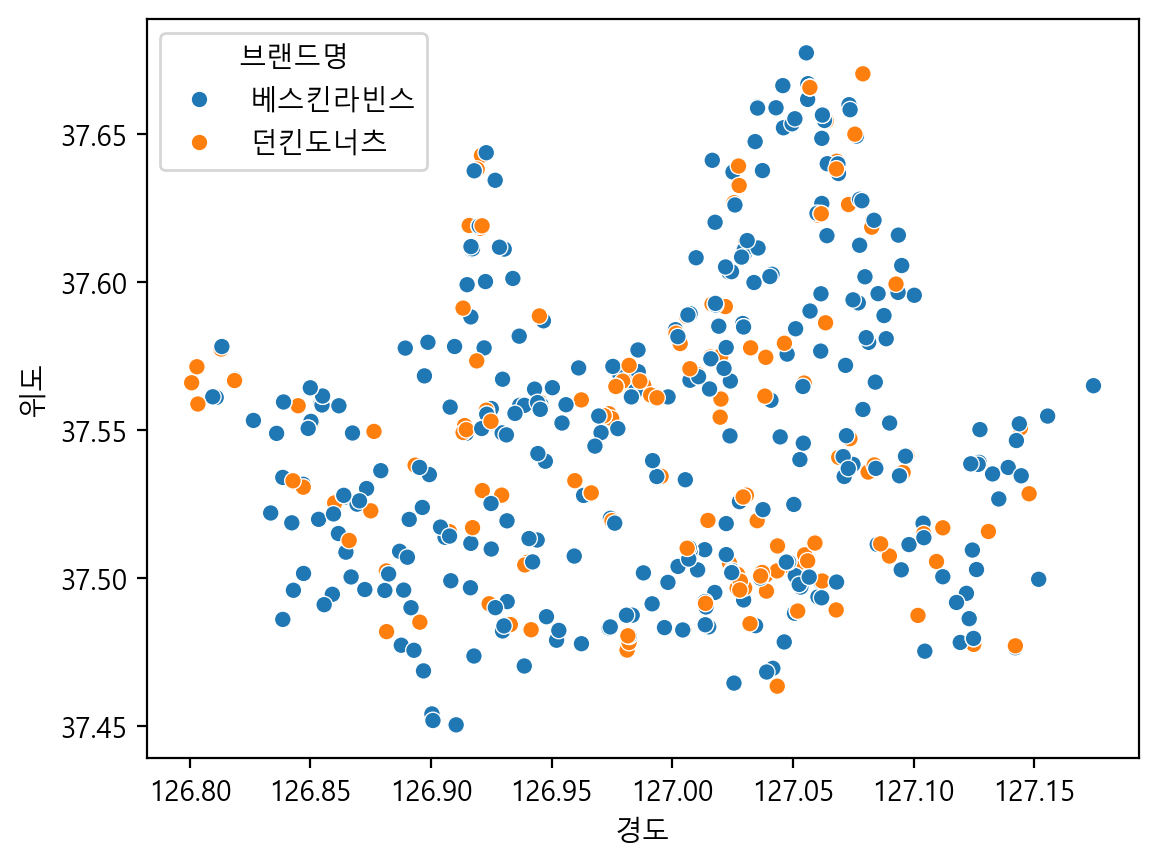

In [107]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.

sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

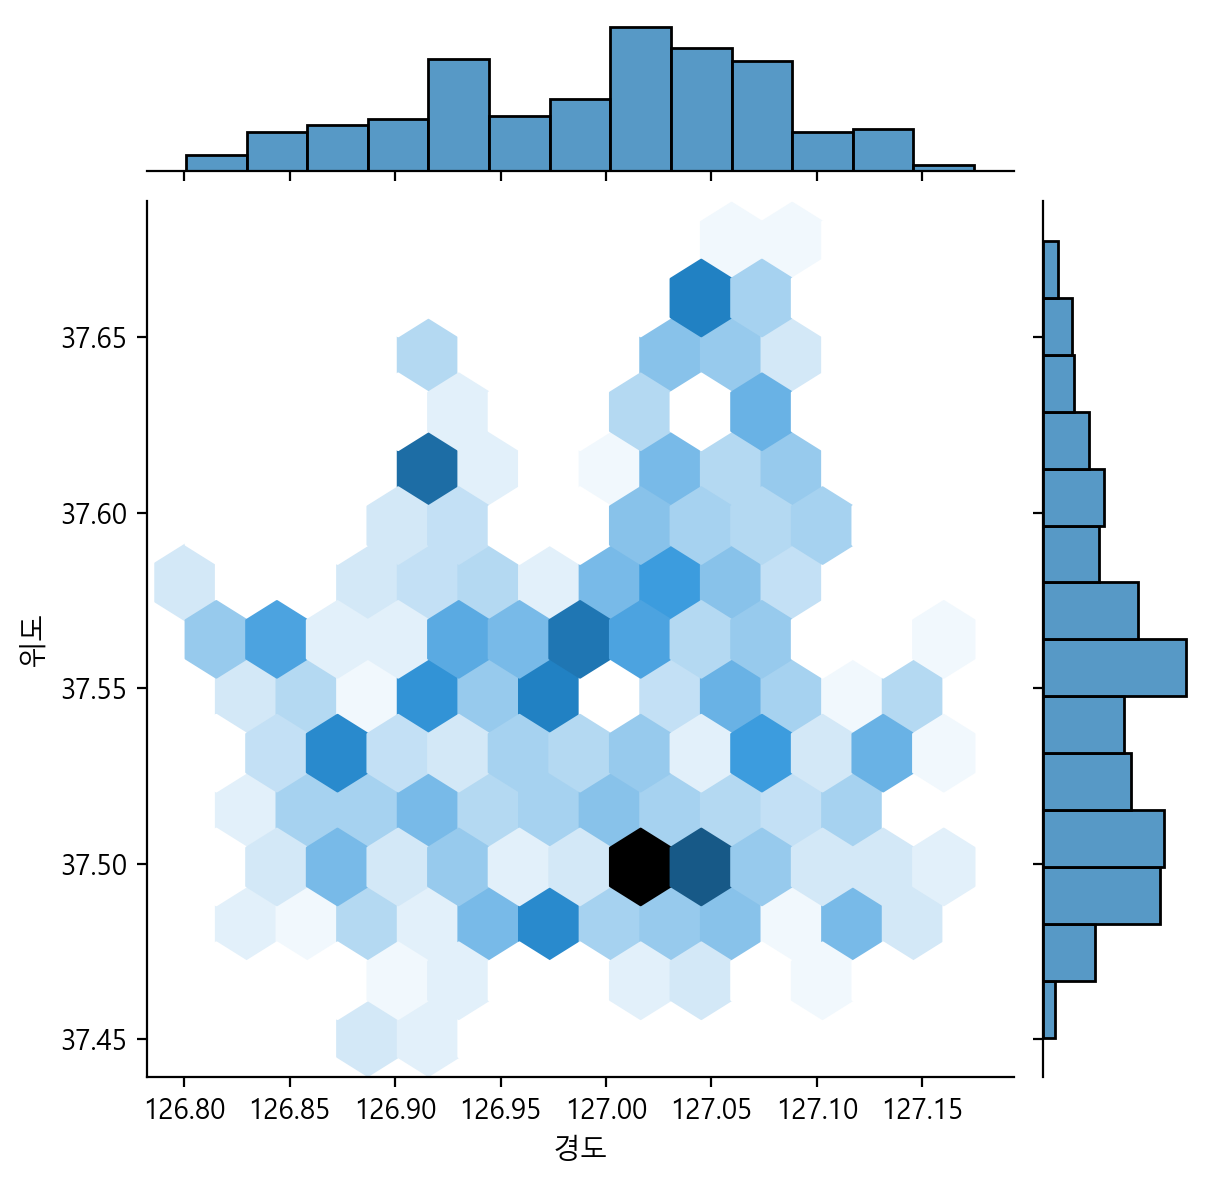

In [111]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.

sns.jointplot(data=df_31, x='경도', y='위도', kind="hex")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/main/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/

In [112]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

import folium

In [117]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 

long = df_31['경도'].mean()
lat = df_31['위도'].mean()

In [125]:
df_31.sample()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
416638,던킨도너츠홍제역점,음식,패스트푸드,도너츠전문,서울특별시,서대문구,홍제3동,홍제동,서울특별시 서대문구 통일로 442,126.944911,37.588507,던킨도너츠홍제역점,던킨도너츠


In [138]:
# 샘플을 하나 추출해서 지도에 표시해 봅니다.

m = folium.Map(location=[37.55, 126.98], zoom_start=12)

folium.Marker(
    [37.55, 126.98],
    popup='<i>DunkinDonuts<i>',
    tooltip='Click Me').add_to(m)

m.save('index.html')
m

In [132]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.

df_31_100 = df_31.sample(100, random_state=42)
df_31_100

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
360142,배스킨라빈스31영등포구청점,음식,패스트푸드,아이스크림판매,서울특별시,영등포구,당산1동,당산동1가,서울특별시 영등포구 당산로 104,126.896396,37.523846,배스킨라빈스31영등포구청점,베스킨라빈스
140941,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,서대문구,홍제2동,홍제동,서울특별시 서대문구 통일로 420,126.946507,37.586962,베스킨라빈스,베스킨라빈스
422232,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,중구,회현동,남대문로5가,서울특별시 중구 한강대로 416,126.973740,37.555495,던킨도너츠,던킨도너츠
354774,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,강남구,도곡2동,도곡동,서울특별시 강남구 언주로30길 21,127.051987,37.488858,배스킨라빈스31,베스킨라빈스
365246,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,노원구,중계4동,중계동,서울특별시 노원구 한글비석로 384,127.073266,37.659848,배스킨라빈스31,베스킨라빈스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71018,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,동대문구,전농2동,전농동,서울특별시 동대문구 사가정로 148,127.061517,37.576634,베스킨라빈스,베스킨라빈스
165258,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,도봉구,창3동,창동,서울특별시 도봉구 덕릉로 220,127.037376,37.637602,배스킨라빈스,베스킨라빈스
313856,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,성북구,정릉2동,정릉동,서울특별시 성북구 보국문로 43,127.009871,37.608163,배스킨라빈스31,베스킨라빈스
105329,baskinrobbins,음식,패스트푸드,아이스크림판매,서울특별시,강남구,도곡2동,도곡동,서울특별시 강남구 언주로30길 13,127.050661,37.488136,baskinrobbins,베스킨라빈스


In [ ]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.

m.save('index.html')

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [140]:
# 데이터프레임의 인덱스만 출력합니다.

df_31.index

Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,  13042,
        13925,
       ...
       554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929, 561930,
       569825],
      dtype='int64', length=655)

### 기본 마커로 표현하기

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

m = folium.Map(location=[37.55, 126.98], zoom_start=12)

folium.Marker(
    [37.55, 126.98],
    popup='<i>DunkinDonuts<i>',
    tooltip='Click Me').add_to(m)

m.save('index.html')
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [158]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.

import folium
m = folium.Map([lat, long], zoom_start=12)

for i in df_31.index[:10]:

    sub_lat = df_31.loc[i, '위도']
    sub_long = df_31.loc[i, '경도']
    title = df_31.loc[i, '상호명'] + "-" + df_31.loc[i, '도로명주소']

    icon_color = 'blue'
    if df_31.loc[i, '브랜드명'] == '던킨도너츠':
        icon_color = 'red'
    
    folium.Marker([sub_lat, sub_long],
                  icon=folium.Icon(color=icon_color),
                  popup = f'<i>{title}</i>',
                  tooltip = title 
                  ).add_to(m)
    
    m.save('franchise_map.html')
    m

In [145]:
import folium

# Create a Folium map centered on the mean coordinates
mean_lat = df_31_100['위도'].mean()
mean_lon = df_31_100['경도'].mean()
map_center = [mean_lat, mean_lon]
franchise_map = folium.Map(location=map_center, zoom_start=13)

# Add markers to the map
for idx, row in df_31_100.iterrows():
    lat = row['위도']
    lon = row['경도']
    address = row['도로명주소']
    name = row['상호명']
    folium.Marker([lat, lon], popup=address, tooltip=name).add_to(franchise_map)

# Display the map
franchise_map


In [148]:
from folium.plugins import MarkerCluster

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(franchise_map)

# Add markers to the cluster
for idx, row in df_31_100.iterrows():
    lat = row['위도']
    lon = row['경도']
    address = row['도로명주소']
    name = row['상호명']
    folium.Marker([lat, lon], popup=address, tooltip=name).add_to(marker_cluster)

from folium import plugins

# Create a heatmap
franchise_heatmap = plugins.HeatMap(data=df_31_100[['위도', '경도']].values.tolist())
franchise_heatmap.add_to(franchise_map)


In [149]:
from folium.plugins import MiniMap

# Add layers to the map
marker_cluster.add_to(franchise_map)
franchise_heatmap.add_to(franchise_map)
folium.LayerControl().add_to(franchise_map)

# Add a minimap
minimap = MiniMap(toggle_display=True)
franchise_map.add_child(minimap)


## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [165]:
df_seoul['상호명'].str.extract("뚜레(주|쥬)르")[0].value_counts()

0
쥬    257
주      1
Name: count, dtype: int64

In [170]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.
# df_bread 라는 데이터프레임에 담습니다.

df_bread = df_seoul[df_seoul['상호명'].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()
df_bread.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_17740\2313198425.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_bread = df_seoul[df_seoul['상호명'].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
2935,뚜레쥬르,음식,제과제빵떡케익,제과점,서울특별시,노원구,공릉2동,공릉동,서울특별시 노원구 공릉로 213,127.077295,37.628289,뚜레쥬르
13843,뚜레쥬르,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초4동,서초동,서울특별시 서초구 서초대로 411,127.025904,37.498098,뚜레쥬르
14031,파리바게뜨길동사거리점,음식,제과제빵떡케익,제과점,서울특별시,강동구,성내3동,성내동,서울특별시 강동구 천호대로 1128,127.136501,37.534154,파리바게뜨길동사거리점
14229,파리바게뜨상계제일점,음식,제과제빵떡케익,제과점,서울특별시,노원구,상계10동,상계동,서울특별시 노원구 노원로 540,127.059227,37.661367,파리바게뜨상계제일점
14246,뚜레쥬르중계브라운,음식,제과제빵떡케익,제과점,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 동일로203가길 29,127.064245,37.639918,뚜레쥬르중계브라운


### 가져온 데이터가 맞는지 확인하기

In [171]:
# 잘못 가져온 데이터가 있는지 확인합니다.

df_bread['상권업종대분류명'].value_counts()

상권업종대분류명
음식       823
학문/교육      2
Name: count, dtype: int64

In [174]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.

df_bread[df_bread['상권업종대분류명'] != '학문/교육']

(825, 12)
(823, 12)


In [ ]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.

print(df_bread.shape)
df_bread = df_bread[df_bread['상권업종대분류명'] != '학문/교육']
print(df_bread.shape)

In [176]:
# 상호명의 unique 값을 봅니다.

df_bread['상호명'].unique()

array(['뚜레쥬르', '파리바게뜨길동사거리점', '파리바게뜨상계제일점', '뚜레쥬르중계브라운', '파리바게뜨-판매옥수점',
       '파리바게뜨당고개점', '파리바게뜨목동오거리점', '뚜레쥬르신당역점', '파리바게뜨', '파리바게뜨서강신수점',
       '파리크라상', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점', '파리바게뜨종로구기',
       '뚜레쥬르왕십리민자역사점왕십리민자역사점', '파리크라상교대역점', '뚜레쥬르도선사거리점', '여의도2호파리크라상',
       '목동파리크라상', '뚜레쥬르개봉역점', '파리바게뜨외대점', '파리크라상파스쿠찌홍', '파리크라상파스쿠찌압',
       'CJ뚜레쥬르', '신목파리바게뜨', '방주산업뚜레쥬르광화문경희궁의', '파리크라상파스쿠찌서', '파리크라상파스쿠찌도',
       '강동경희파리바게뜨', '파리크라상이대점', '파리크라상파스쿠찌압구정역2호', '뚜레쥬르송천센트레빌점',
       '파리크라상잠바주스디큐브', '파리크라상잠바주스대치역', '파리바게트', '상계뚜레쥬르', '뚜레쥬르대림3동점',
       '뚜레쥬르목4동점', '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '뚜레쥬르독산지식센터점',
       '파리바게뜨수락리버시티', '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '뚜레쥬르방화역점', '파리바게뜨중앙대점',
       '뚜레쥬르레이크펠리스점', '파리바게뜨장안현대점', '뚜레쥬르우이점', '파리바게뜨성북점', '뚜레쥬르양천푸른점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '뚜레쥬르엔시티보라매', '파리바게뜨종로시그니처점',
       '파리바게뜨상계보람점', '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점',
       '뚜레쥬르창동SM마트', '파리바게뜨카페대학로점', '파리바게뜨대림역점', '파리바게뜨월계미성', '파리크라상서래점',
       '파리바게뜨금천한양점', '씨

In [178]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요.

print(df_bread.shape)
# df_bread[df_bread['상호명'] != '파스쿠찌|잠바주스']
df_bread = df_bread[df_bread['상호명'].str.contains('파스쿠찌|잠바주스')].copy()
print(df_bread.shape)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
150108,파리크라상파스쿠찌홍,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,서강동,상수동,서울특별시 마포구 와우산로 94,126.924922,37.552600,파리크라상파스쿠찌홍
150916,파리크라상파스쿠찌압,음식,제과제빵떡케익,제과점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 논현로 868,127.028866,37.526073,파리크라상파스쿠찌압
165698,파리크라상파스쿠찌서,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,연건동,서울특별시 종로구 대학로5가길 23,127.001032,37.578832,파리크라상파스쿠찌서
166894,파리크라상파스쿠찌도,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로87길 22,127.059427,37.509624,파리크라상파스쿠찌도
167937,파리크라상파스쿠찌서,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,연건동,서울특별시 종로구 대학로 101,126.997184,37.580448,파리크라상파스쿠찌서
173293,파리크라상파스쿠찌압구정역2호,음식,제과제빵떡케익,제과점,서울특별시,강남구,신사동,신사동,서울특별시 강남구 압구정로 162,127.027449,37.526305,파리크라상파스쿠찌압구정역2호
173492,파리크라상잠바주스디큐브,음식,커피점/카페,생과일주스전문점,서울특별시,구로구,신도림동,신도림동,서울특별시 구로구 경인로 662,126.888485,37.508058,파리크라상잠바주스디큐브
173775,파리크라상잠바주스대치역,음식,제과제빵떡케익,제과점,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2942,127.062308,37.493635,파리크라상잠바주스대치역
263755,파리크라상잠바주스동,음식,제과제빵떡케익,제과점,서울특별시,용산구,이촌1동,이촌동,서울특별시 용산구 이촌로 245,126.974348,37.520170,파리크라상잠바주스동
267247,파리크라상잠바주스삼,음식,제과제빵떡케익,제과점,서울특별시,서초구,서초2동,서초동,서울특별시 서초구 서초대로78길 22,127.027528,37.495796,파리크라상잠바주스삼


In [179]:
# 브랜드명 컬럼을 만듭니다. "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.
# 파리크라상에 대한 처리를 따로 해주세요!

df_bread.loc[df_bread["상호명"].str.contains("파리크라상"), "브랜드명"] = "파리바게뜨"
df_bread[['상호명', '브랜드명']].head()

C:\Users\pc\AppData\Local\Temp\ipykernel_17740\2569759442.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '파리바게뜨' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_bread.loc[df_bread["상호명"].str.contains("파리크라상"), "브랜드명"] = "파리바게뜨"


,상호명,브랜드명
2935,뚜레쥬르,NaN
13843,뚜레쥬르,NaN
14031,파리바게뜨길동사거리점,NaN
14229,파리바게뜨상계제일점,NaN
14246,뚜레쥬르중계브라운,NaN


In [180]:
# 브랜드명 컬럼의 결측치는 "뚜레쥬르" 이기 때문에 fillna 를 사용해서 값을 채웁니다.

df_bread['브랜드명'] = df_bread['브랜드명'].fillna('뜨레쥬르')
df_bread[['상호명', '브랜드명']].head()

,상호명,브랜드명
2935,뚜레쥬르,뜨레쥬르
13843,뚜레쥬르,뜨레쥬르
14031,파리바게뜨길동사거리점,뜨레쥬르
14229,파리바게뜨상계제일점,뜨레쥬르
14246,뚜레쥬르중계브라운,뜨레쥬르


### 범주형 변수 빈도수 계산하기

In [181]:
# 브랜드명의 빈도수를 봅니다.

df_bread['브랜드명'].value_counts()

브랜드명
뜨레쥬르     770
파리바게뜨     53
Name: count, dtype: int64

In [182]:
df_bread['브랜드명'].value_counts(normalize=True)

브랜드명
뜨레쥬르     0.935601
파리바게뜨    0.064399
Name: proportion, dtype: float64

<Axes: xlabel='브랜드명', ylabel='count'>

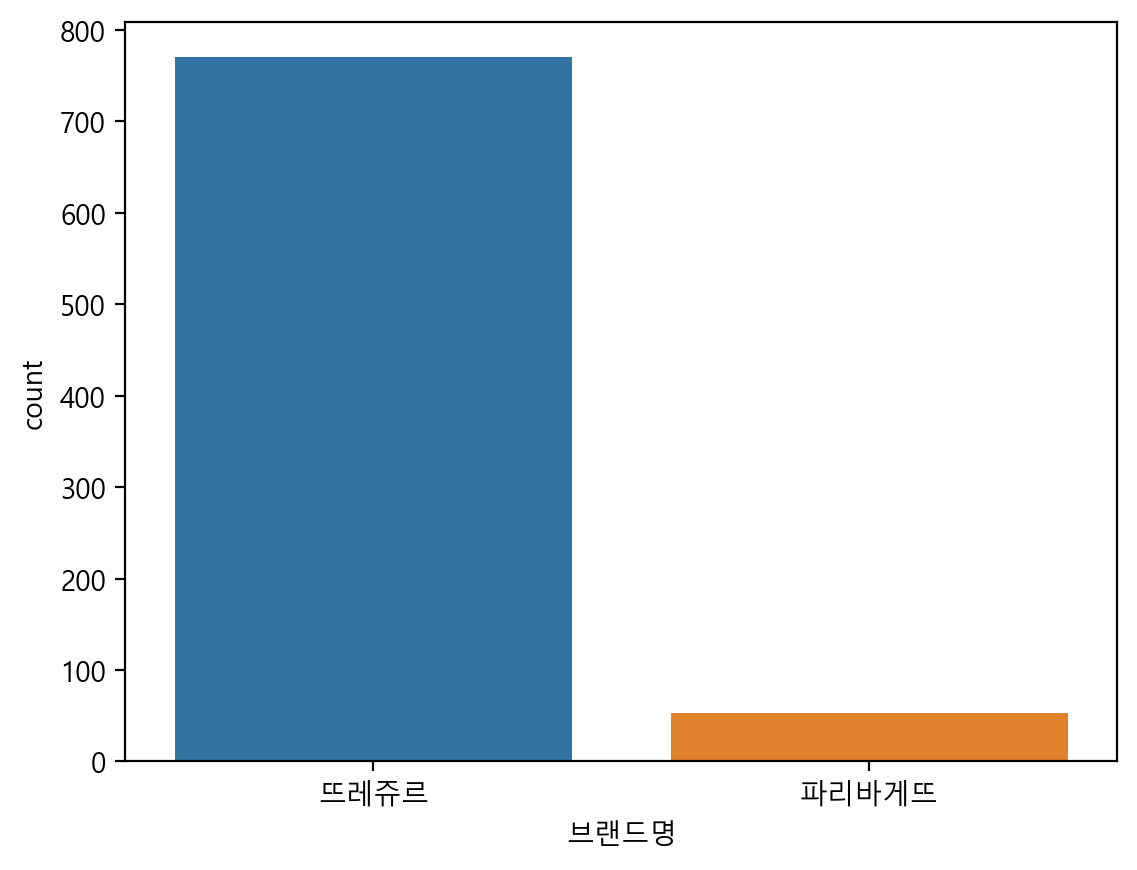

In [184]:
# countplot 으로 브랜드명을 그려봅니다.

sns.countplot(data=df_bread, x='브랜드명', hue='브랜드명')

<Axes: xlabel='시군구명', ylabel='count'>

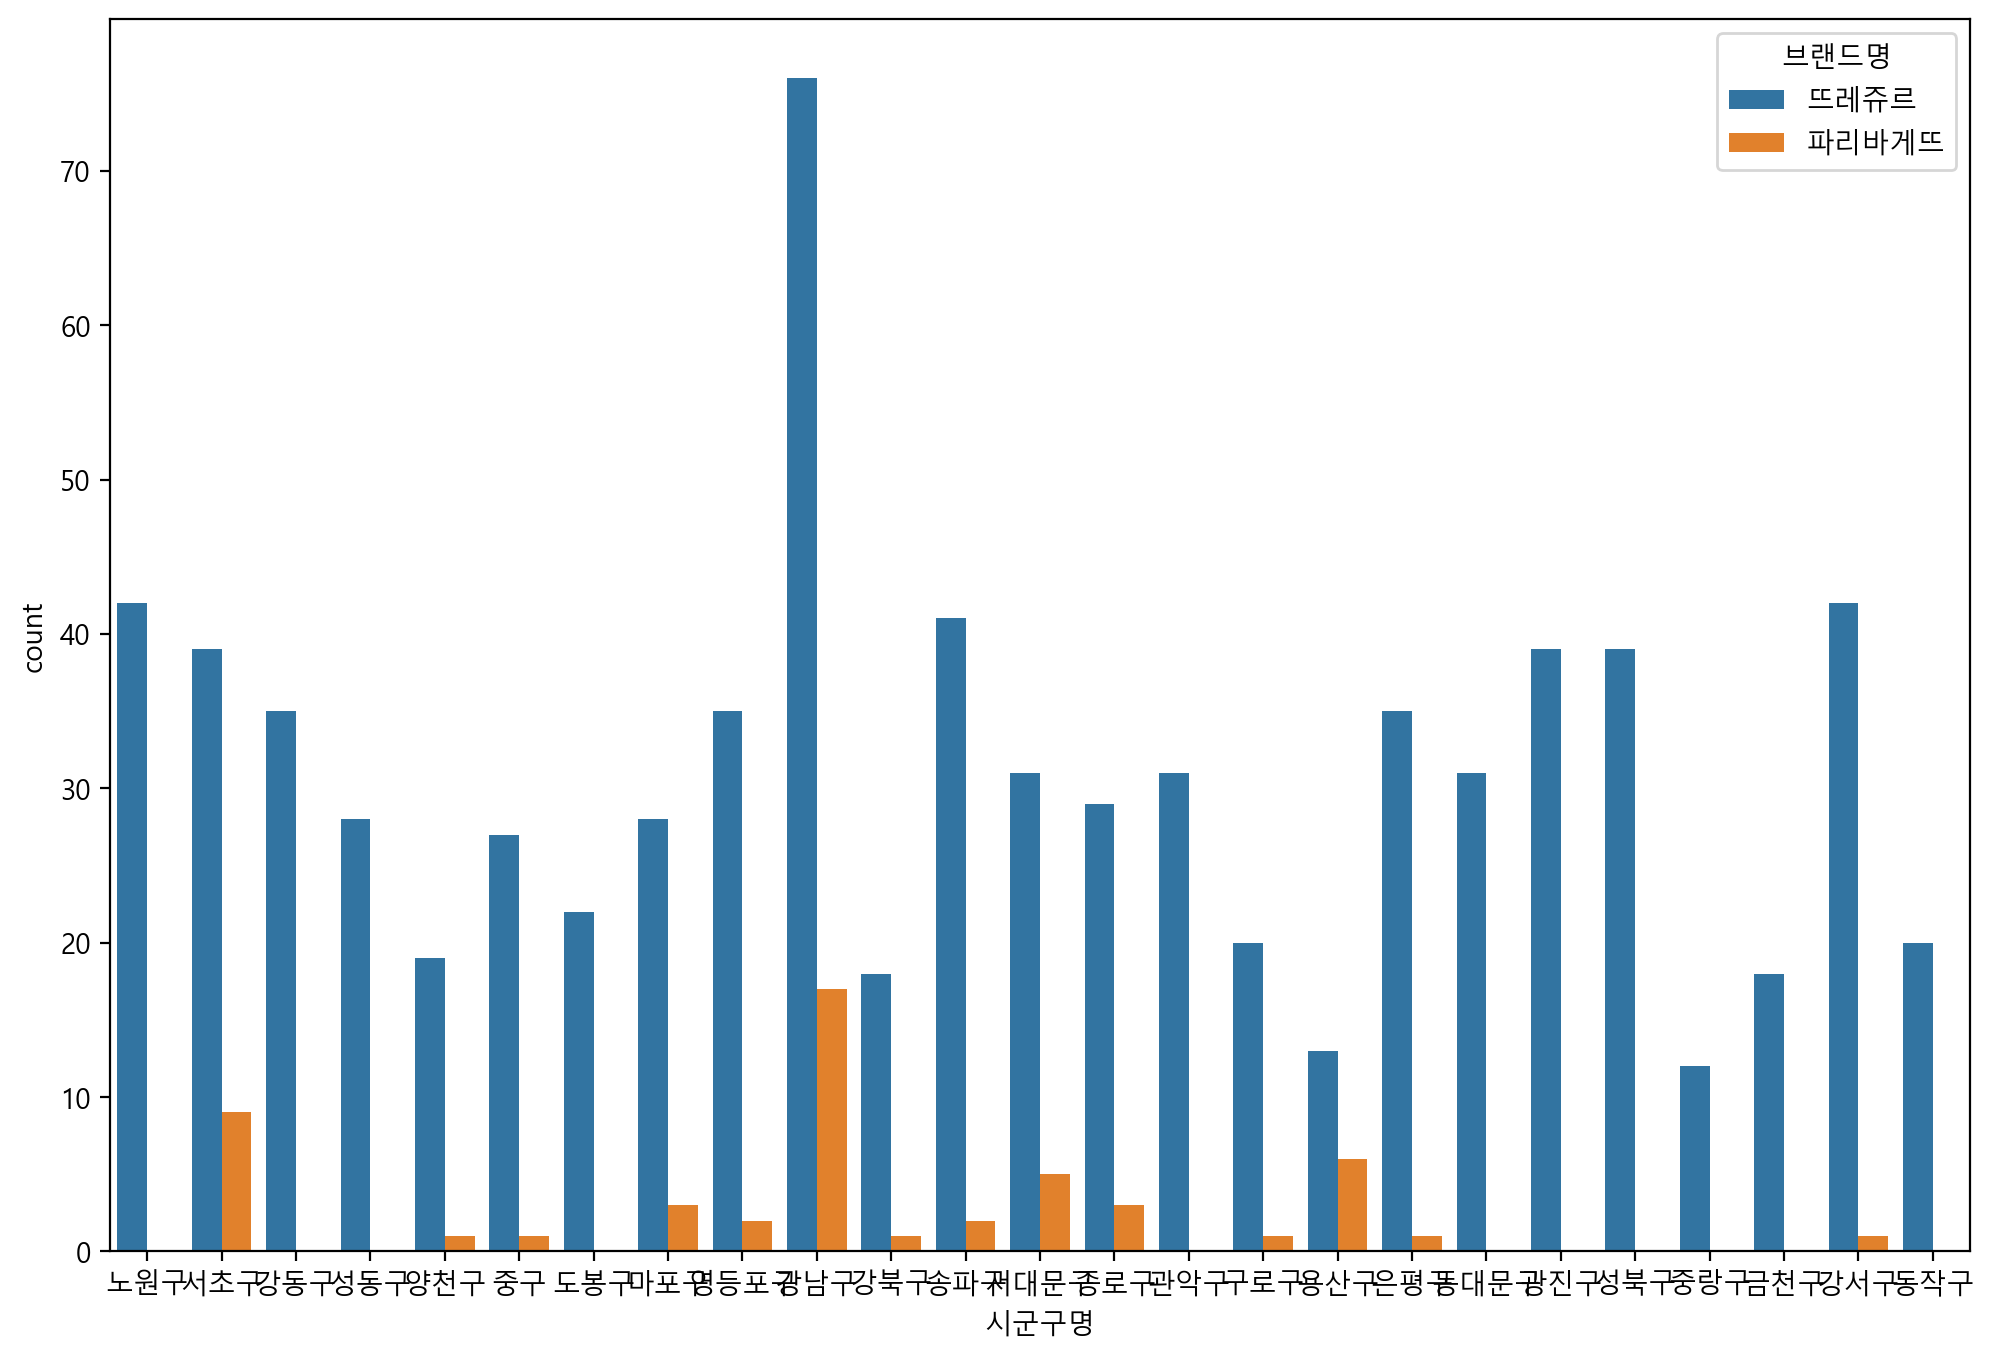

In [187]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.

plt.figure(figsize=(12, 8))
sns.countplot(data=df_bread, x='시군구명', hue='브랜드명')

<Axes: xlabel='경도', ylabel='위도'>

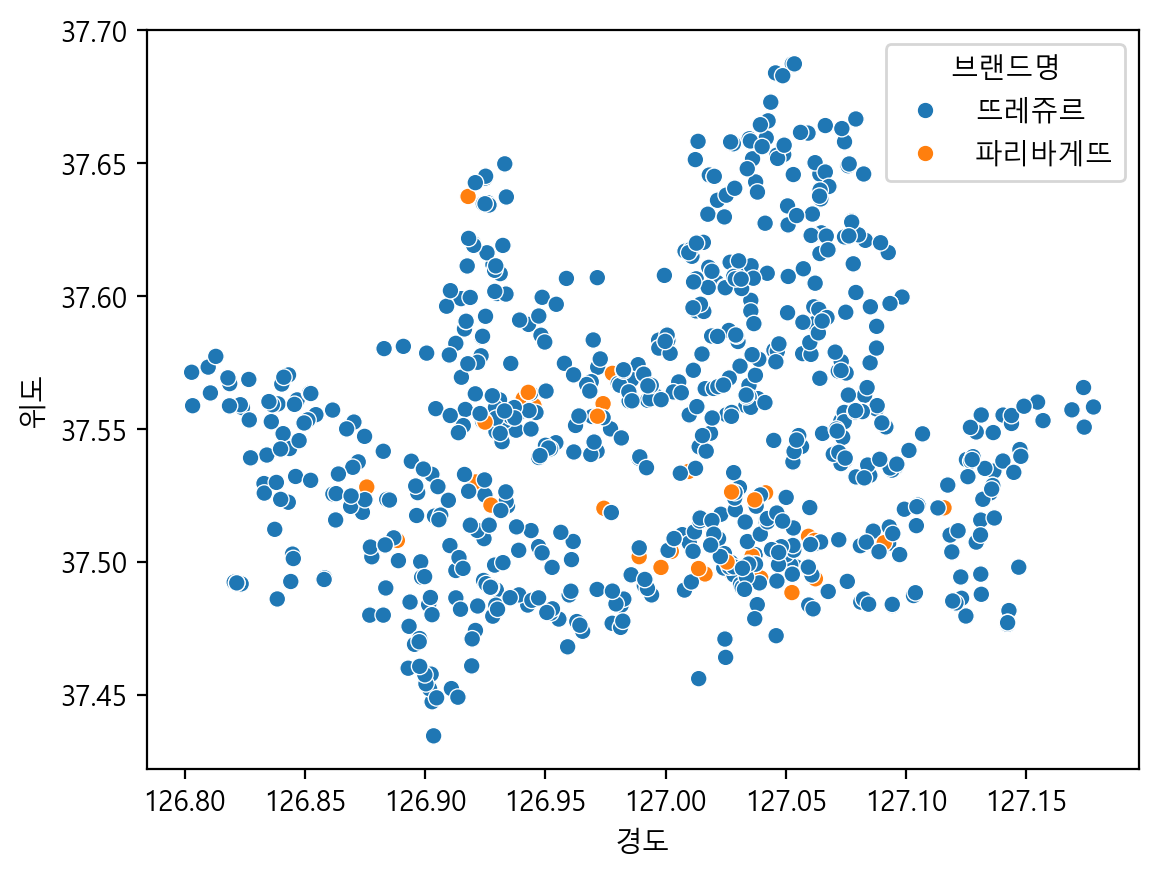

In [188]:
# scatterplot 으로 위경도를 표현해 봅니다.

sns.scatterplot(data=df_bread, x='경도', y='위도', hue='브랜드명')

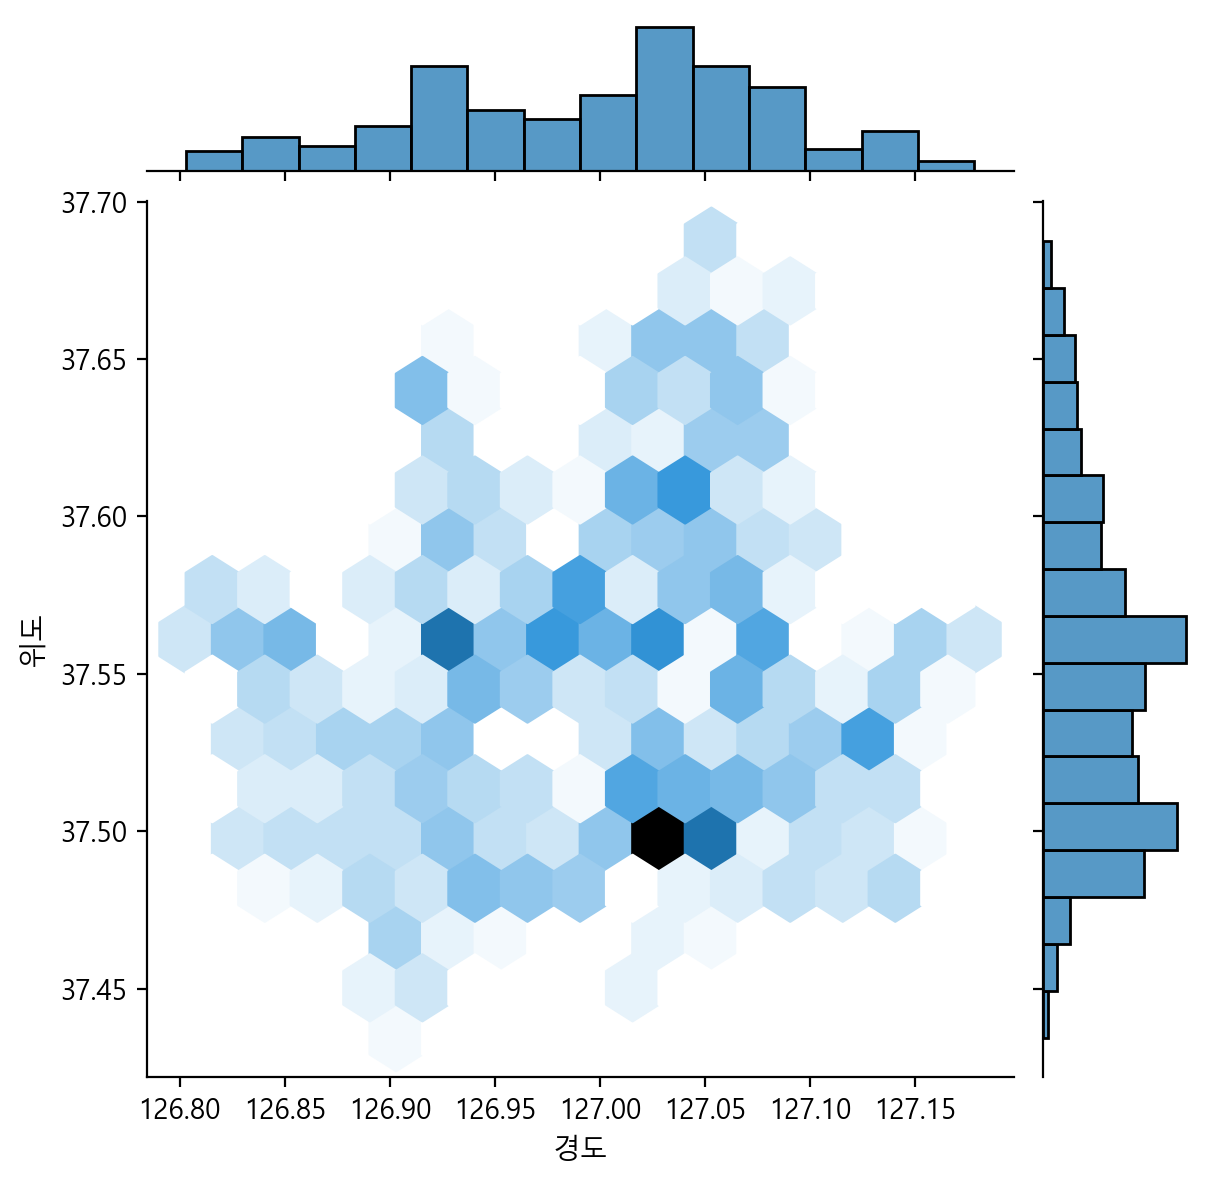

In [190]:
# jointplot 으로 위경도를 표현해 봅니다.

sns.jointplot(data=df_bread, x='경도', y='위도', kind='hex')

## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [191]:
df_bread.index

Index([  2935,  13843,  14031,  14229,  14246,  14713,  14842,  14889,  14897,
        15019,
       ...
       544366, 544527, 551365, 555475, 556168, 559820, 561538, 561810, 569327,
       569479],
      dtype='int64', length=823)

In [194]:
df_bread.loc[2935, '위도']

37.6282888149588

In [195]:
for i in df_bread.index:
    print(i)

2935
13843
14031
14229
14246
14713
14842
14889
14897
15019
15075
15210
15295
15308
15313
15932
21076
21098
29050
29756
32976
34846
37488
40363
44665
52769
55142
67512
72200
87075
88167
89741
110250
113801
127482
129359
129476
135663
138210
140703
142629
147219
149653
149962
150108
150916
159501
162889
164411
164856
165698
166524
166853
166854
166894
167366
167711
167937
168353
169336
171022
171755
173293
173389
173492
173775
174333
175508
175761
182862
186608
187749
187981
189464
190647
191338
191900
192027
192163
192752
195070
196818
200552
201124
201162
201254
202723
202830
203299
204549
204649
204690
205108
206922
207957
207997
208552
209289
209292
209311
210514
213906
214127
214162
214251
214388
216658
217070
217580
218007
220102
221211
221751
221797
222152
222321
222328
222405
226807
227436
227505
227540
227900
228823
230578
230665
230669
231267
231593
231802
235081
237546
237864
237998
238152
239434
239463
240390
241097
241507
242005
243714
243715
244224
244238
244297
244746
2447

In [199]:
import folium

# Create a base map centered on the average latitude and longitude
lat, long = df_bread[["위도", "경도"]].mean().values
m = folium.Map(location=[lat, long], zoom_start=12)

# Create a feature group to hold the markers
marker_cluster = folium.plugins.MarkerCluster().add_to(m)

# Iterate over the DataFrame and add markers
for i, row in df_bread.iterrows():
    sub_lat = row["위도"]
    sub_long = row["경도"]
    title = f"{row['상호명']} - {row['도로명주소']}"
    
    icon_color = "blue"
    if row["브랜드명"] == "뚜레쥬르":
        icon_color = "green"
    
    folium.Marker(
        [sub_lat, sub_long],
        popup=folium.Popup(title, max_width=300),
        tooltip=title,
        icon=folium.Icon(color=icon_color)
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('index.html')
m

In [200]:
m = folium.Map([lat, long], zoom_start=12, tiles='Stamen Toner')
for i in df_bread.index:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    title = df_bread.loc[i, '상호명'] + '-' + df_bread.loc[i, '도로명주소']
    icon_color = 'blue'
    if df_bread.loc[i, '브랜드명'] == '뚜레쥬르':
        icon_color = 'green'
    folium.CircleMarker(
        [sub_lat, sub_long],
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>',
        tooltip=title
    ).add_to(m)
m.save('paris-tour.html')
m

ValueError: Custom tiles must have an attribution.

In [202]:
import folium

# Read the latitude and longitude from the DataFrame
lat = df_bread['위도'].mean()
long = df_bread['경도'].mean()

# Create a base map centered on the average latitude and longitude
m = folium.Map(location=[lat, long], zoom_start=12, tiles='Stamen Toner')

# Create a feature group to hold the markers
marker_cluster = folium.plugins.MarkerCluster().add_to(m)

# Iterate over the DataFrame and add markers
for row in df_bread.iterrows():
    sub_lat = row['위도']
    sub_long = row['경도']
    title = f"{row['상호명']} - {row['도로명주소']}"
    
    icon_color = 'blue'
    if row['브랜드명'] == '뚜레쥬르':
        icon_color = 'green'
    
    folium.Marker(
        [sub_lat, sub_long],
        popup=folium.Popup(title, max_width=300),
        tooltip=title,
        icon=folium.Icon(color=icon_color)
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('paris-tour.html')


ValueError: Custom tiles must have an attribution.

In [ ]:
# for i in df_bread.index:
#     print(i)

In [ ]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.


### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [203]:
# heatmap 예제 이해하기

data = (
    np.random.normal(size=(100, 3)) *
    np.array([[1, 1, 1]]) +
    np.array([[48, 5, 1]])
).tolist()
data[:5]

[[48.93357858892261, 5.595762144553673, -0.7839199230604941],
 [48.01760942642326, 4.247326501783564, 1.8479044035718113],
 [48.63331023857629, 5.2933563646700215, 2.4733512278446],
 [49.13033820150975, 6.730560371207661, 2.1955055873180647],
 [47.779678304638644, 1.984240662435024, 1.8825526337711924]]

In [204]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기

heat = df_bread[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].str.strip()
heat["브랜드명"] = heat["브랜드명"].replace("뚜레쥬르", 1).replace("파리바게뜨", 1)
heat = heat.values
# heat

In [205]:
heat[:5]

array([[37.6282888149588, 127.07729472919, '뜨레쥬르'],
       [37.4980981742341, 127.025903621913, '뜨레쥬르'],
       [37.5341537566639, 127.136500690129, '뜨레쥬르'],
       [37.6613673147123, 127.059227003484, '뜨레쥬르'],
       [37.6399175500813, 127.064245152134, '뜨레쥬르']], dtype=object)

In [206]:
# HeatMap 그리기
from folium.plugins import HeatMap

m = folium.Map([lat, long], tiles='stamentoner', zoom_start=12)


for i in df_bread.index:
    sub_lat = df_bread.loc[i, "위도"]
    sub_long = df_bread.loc[i, "경도"]
    
    title = df_bread.loc[i, "상호명"] + " - " + df_bread.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_bread.loc[i, "브랜드명"] == "뚜레쥬르":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

    
HeatMap(heat).add_to(m)

m.save('Heatmap.html')

m

ValueError: Custom tiles must have an attribution.